2023-11-07 21:38:45.912 
  command:

    streamlit run c:\Users\dhhhy_f065x7t\miniconda3\envs\misy225.1\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


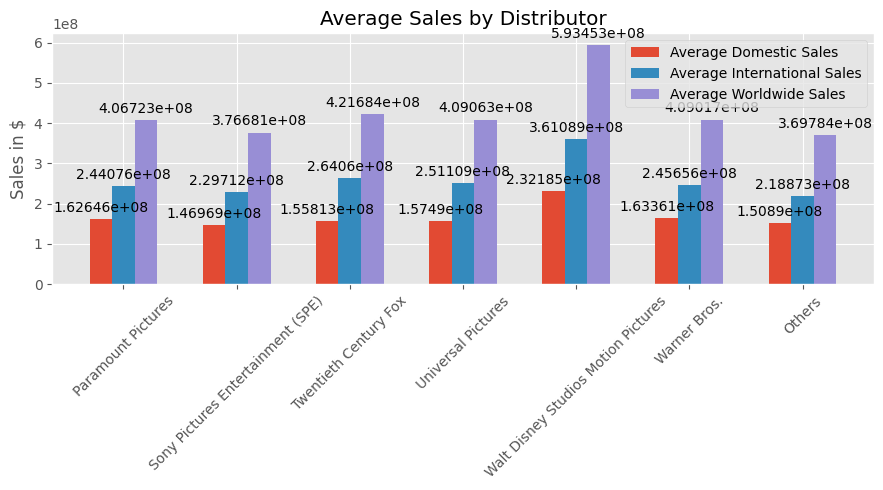

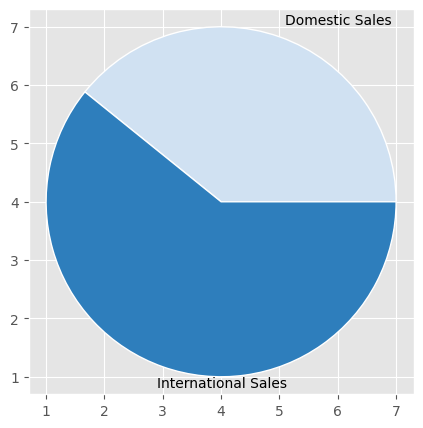

In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Style
plt.style.use('ggplot')

# Title
st.title('A movie Recommendation App ')
st.subheader('by Group3')

# Load Data
df = pd.read_csv('Highest Holywood Grossing Movies.csv')
df['percentage_DomesticSales'] =  100 * df['Domestic Sales (in $)'] / (df['Domestic Sales (in $)'] + df['International Sales (in $)'])
df['percentage_InternationalSales'] = 100 * df['International Sales (in $)'] / (df['Domestic Sales (in $)'] + df['International Sales (in $)'])
df_o = df

# add a ration to select genre
st.sidebar.subheader('Step 1: Analyze the Domestic sales and international Sales')
Genre_filter = st.sidebar.radio("Select Your Genre",('Action','Adventure', 'Animation', 'Comedy', 'Drama', 'Family', 'Fantasy', 'Musical','Sci-Fi'))

# add a multiselect by Distributor

Distributor_filter = st.sidebar.multiselect(
    'Choose Your Preferred Distributor', 
    ['Twentieth Century Fox', 
     'Walt Disney Studios Motion Pictures', 
     'Paramount Pictures', 
     'Universal Pictures', 
     'Sony Pictures Entertainment (SPE)', 
     'Warner Bros.', 
     'Others'],  # add 'Others' to include all other distributors
    default=['Twentieth Century Fox', 'Walt Disney Studios Motion Pictures']  #I am not sure about the default
)


# add multiselect by years
years = [list(range(start_year, start_year + 5)) for start_year in range(df['Year'].min(), df['Year'].max() + 1, 5)]
selected_years = st.multiselect('Choose release years', years)

filtered_df = df[df['Year'].isin(selected_years)]


# Clean the sales columns in the original dataframe (if necessary)
sales_cols = ['Domestic Sales (in $)', 'International Sales (in $)', 'World Wide Sales (in $)']
df[sales_cols] = df[sales_cols].replace('[\$,]', '', regex=True).astype(float)

distributors = [
    'Twentieth Century Fox',
    'Walt Disney Studios Motion Pictures',
    'Paramount Pictures',
    'Universal Pictures',
    'Sony Pictures Entertainment (SPE)',
    'Warner Bros.'
]

# Filter dataframe based on distributors
displayed_df = df[df['Distributor'].isin(distributors)].copy()
others_df = df[~df['Distributor'].isin(distributors)].copy()

# Group the data by 'Distributor' and calculate the average sales figures for displayed distributors and others.
grouped_sales_displayed = displayed_df.groupby('Distributor')[sales_cols].mean().reset_index()
grouped_sales_others = others_df[sales_cols].mean().to_frame().T
grouped_sales_others['Distributor'] = 'Others'

grouped_sales = pd.concat([grouped_sales_displayed, grouped_sales_others], ignore_index=True)



# Create a bar chart
st.subheader('Average Sales by Distributor')
fig, ax = plt.subplots(figsize=(9, 5))
x = np.arange(len(grouped_sales['Distributor'])) 
width = 0.2  

rects1 = ax.bar(x - width, grouped_sales['Domestic Sales (in $)'], width, label='Average Domestic Sales')
rects2 = ax.bar(x, grouped_sales['International Sales (in $)'], width, label='Average International Sales')
rects3 = ax.bar(x + width, grouped_sales['World Wide Sales (in $)'], width, label='Average Worldwide Sales')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Sales in $')
ax.set_title('Average Sales by Distributor')
ax.set_xticks(x)
ax.set_xticklabels(grouped_sales['Distributor'], rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

# Display the plot in Streamlit app
st.pyplot(fig)

# Pie chart
st.subheader('Sales Distribution')
st.markdown('''##### ~The piechart below may give you a general view on whether the movie selected by you more popular in the United States or in other countries outside of the United States.''')
x = [df['Domestic Sales (in $)'].mean(), df['International Sales (in $)'].mean()]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(x, labels=['Domestic Sales', 'International Sales'], colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
st.pyplot(fig)

# Display recommended movies
st.subheader('Recommended Movies Based on Your Choice:')
st.write(displayed_df[['Title', 'Genre', 'Distributor', 'Year']])